# Первичный анализ и предобработка данных с Pandas

В этом задании рассмотрим первичный анализ данных на примере реальных данных по шоколадным батончикам. Данные содержат следующие атрибуты: 'company' - компания производитель, 'bar_name' - название шоколадного батончика, 'ref' - номер, 'rew_date' - дата оценки, 'percent' - процент какао бобов, 'company_loc' - местонахождение компании, 'rate' - рейтинг, 'bean_dtype' - тип какао бобов, 'bean_orig' - страна происхождения.

## Численные атрибуты

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:
best_bar= pd.read_csv('flavors_of_cacao.csv',
                       sep=',', header=0, names=['company', 'bar_name','ref', 'rew_date', 'percent', 'company_loc', 'rate', 'bean_dtype', 'bean_orig'])

In [104]:
type(best_bar)

pandas.core.frame.DataFrame

Оставим только местонахождение компании, рейтинг, процент какао бобов и страну происхождения для дальнейшего анализа.

In [105]:
best_bar = best_bar[['company_loc', 'rate', 'percent', 'bean_orig']]
best_bar.head() 

,company_loc,rate,percent,bean_orig
0,France,3.75,63%,Sao Tome
1,France,2.75,70%,Togo
2,France,3.00,70%,Togo
3,France,3.50,70%,Togo
4,France,3.50,70%,Peru


Необходимо построить гистограмму распределения рейтинга батончика через plot(). Количество столбцов гистограммы равно 20.
На одном графике необходимо построить график плотности вероятности, который строится на основе оценки непрерывного распределения вероятности. Гистограммы аппроксимируют комбинацией ядре, т.е. более простых распределений, например нормального (распределение Гаусса). Поэтому графики плотности еще называют ядерной оценки плотности (KDE-kernel density estimate). Строится kde с помощью функции плот с параметром kind='kde'.

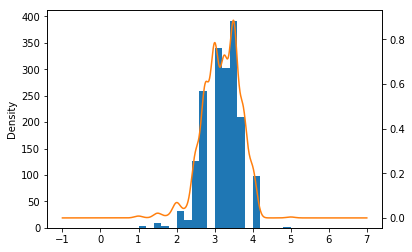

In [106]:
best_bar['rate'].plot(kind='hist', bins = 20)
best_bar['rate'].plot(kind='kde',secondary_y=True)

plt.show()

Необходимо построить гистограмму распределения для процента какао бобов. Однако, следует отметить, что данные атрибут имеет тип object. Гистограмму для такого типа построить не получится. 
Необходимо преобразовать данный тип в float с помощью функции apply. Внутри функции apply используйте lambda выражение, чтобы убрать знак '%' в конце каждого элемента, а затем преобразовать данные в тип с плавающей точкой.

In [107]:
best_bar.percent.dtype
best_bar.percent = best_bar.percent.apply(lambda p: np.float(p.replace("%","")))
best_bar.percent.dtype

dtype('float64')

Постройте scatter plot зависимости рейтинга батончика от процента какао бобов, используя метод plot для Pandas DataFrame с аргументом kind='scatter'. Подпишите картинку.
Необходимо это для того, чтобы оценить зависимость рейтинга от содержания кокао в батончиках. 

Text(0.5, 1.0, 'Зависимость рейтинга батончика от процента какао бобов')

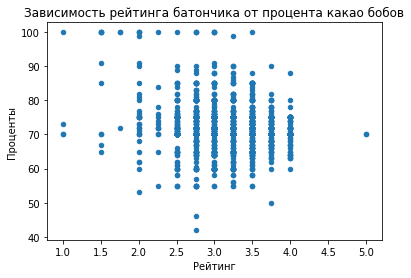

In [108]:
graph = best_bar.plot(kind='scatter', x = ['rate'], y= ['percent'])
graph.set_xlabel('Рейтинг')
graph.set_ylabel('Проценты')
graph.set_title('Зависимость рейтинга батончика от процента какао бобов')

Постройте "ящик с усами" для числовых распределений с помощью функции boxplot. Возпользуйтесь также функцией describe() для каждого распределения.

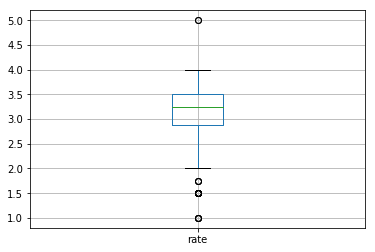

In [109]:
best_bar.boxplot(['rate'])

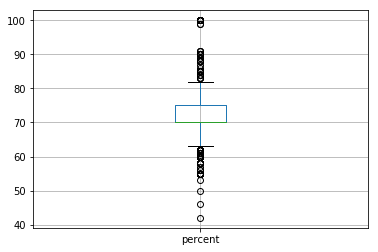

In [110]:
best_bar.boxplot(['percent'])

In [111]:
best_bar[['rate', 'percent']].describe()

,rate,percent
count,1795.000000,1795.000000
mean,3.185933,71.698329
std,0.478062,6.323118
min,1.000000,42.000000
25%,2.875000,70.000000
50%,3.250000,70.000000
75%,3.500000,75.000000
max,5.000000,100.000000


## Категориальные атрибуты

Обратим внимание на категориальные признаки. Построить гистограмму распределения не удастся, но в качестве начального анализа можно воспользоваться функцией value_counts, которая позволяет вывести количество встречающихся значений в атрибуте данных. Обратите внимание внимание на места происхождения бобов, которые редко встречаются в наборе данных. Для вывода начальных и конечных элементов используются функции head() и tail() соответственно.

In [112]:
best_bar['bean_orig'].value_counts().head()

Venezuela             214
Ecuador               193
Peru                  165
Madagascar            145
Dominican Republic    141
Name: bean_orig, dtype: int64

In [113]:
best_bar['bean_orig'].value_counts().tail()

Peru, Belize        1
Suriname            1
Cameroon            1
Venezuela, Ghana    1
Venezuela/ Ghana    1
Name: bean_orig, dtype: int64

После того, как выведено количество уникальных значений можно представить их визуальное распределение с помощью функции plot(kind='bar').

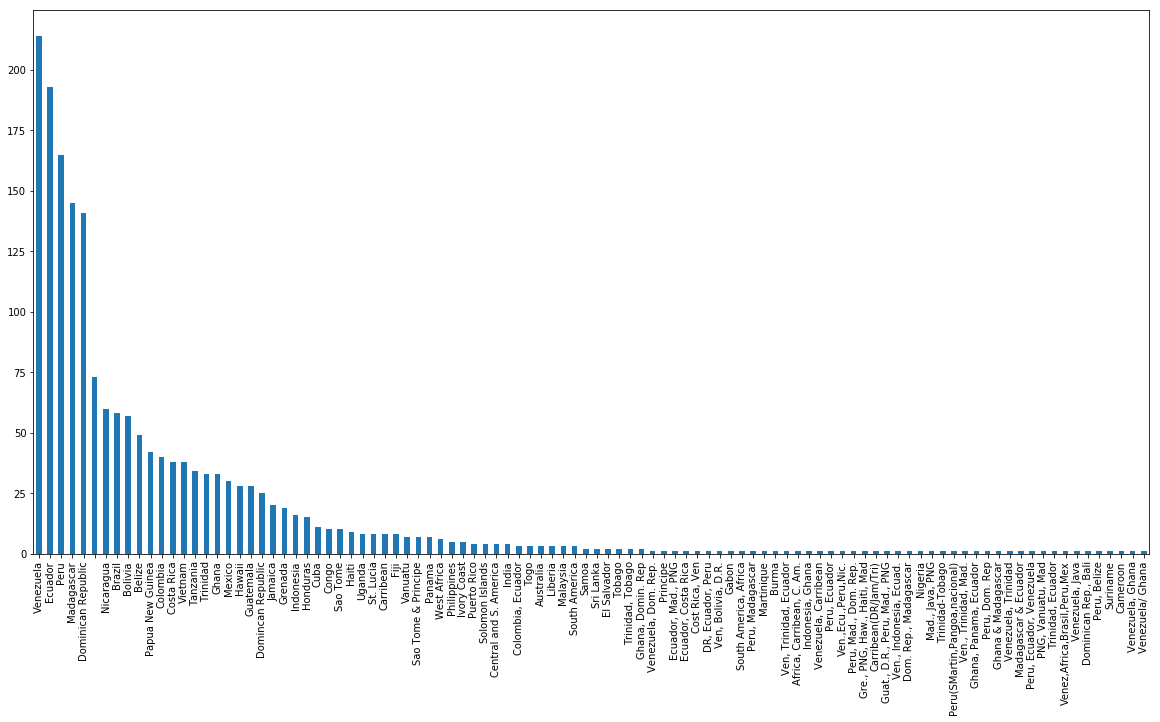

In [114]:
best_bar_value_counts = best_bar['bean_orig'].value_counts()
best_bar_value_counts.plot(kind='bar', figsize = (20,10))


По гистограмме распределения категориальных атрибутов о происхождения какао бобов можно увидеть, что присутствует хаос в данных. Для некоторых объектов названия мест происхождения написаны с ошибками, у некоторых объектов вообще отсутствует место происхождения, а так же есть батончики, состоящие из какао бобов из разных мест происхождения. В этой связи необходимо произвести предобработку данных для дальнейшего анализа.
Для начала убрать объекты с пропущенными записями, используя функцию dropna. Необходимо отметить, что в качестве параметров функции передается 'axis': где 0 - удалять по строкам (объектам), 1 - удалять по столбцам (признакам); 'how': где 'any' - удалять строку или столбец, если есть пустой объект, 'all' - удалять строку или столбец, если все объекты пустые.  

In [115]:
best_bar_value_counts.dropna(axis=0, how='any');

Заметим, что пустые записи из атрибута происхождения бобов не удалилсь. Значит "пустые" записи не являются пустыми. Выведите все уникальные значения атрибута 'bean_orig' с помощью функции unique() и найдите значение пустой записи.

In [116]:
best_bar['bean_orig'].unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', '\xa0', 'Jamaica',
       'Grenada', 'Guatemala', 'Honduras', 'Costa Rica',
       'Domincan Republic', 'Haiti', 'Congo', 'Philippines', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda',
       'Martinique', 'Sao Tome & Principe', 'Vanuatu', 'Australia',
       'Liberia', 'Ecuador, Costa Rica', 'West Africa', 'Hawaii',
       'St. Lucia', 'Cost Rica, Ven', 'Peru, Madagascar',
       'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Tobago', 'Ven., Indonesia, Ecuad.',
       'Trinidad-Tobago

Для того, чтобы исключить данный элемент, необходимо использовать слудующую конструкцию: best_bar['bean_orig'] != 'element value', которая вернет бинарный массив элементов, где True - атрибут объекта не принимает значение 'element value', False - атрибут объекта принимает значение 'element value'. Затем полученную бинарную матрицу передаем в качестве маски, по которой будут выбраны объекты из нашего массива данных.

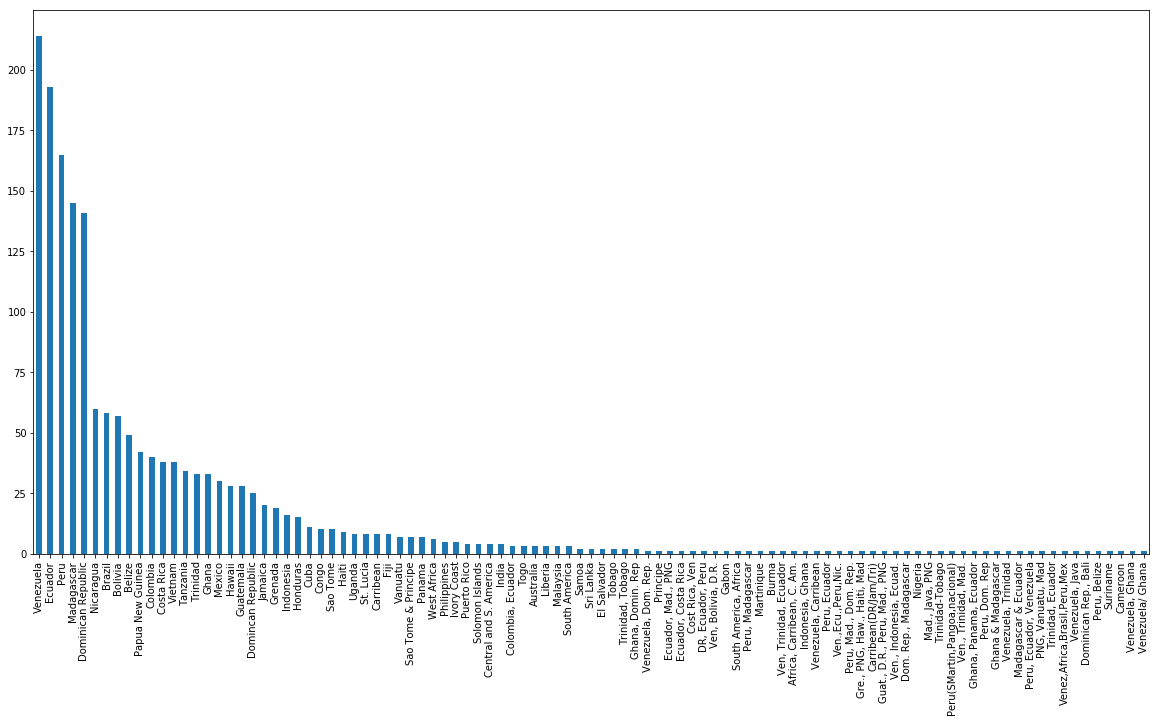

In [117]:
best_bar_unique = best_bar[best_bar['bean_orig'] != '\xa0']
graph_unique = best_bar_unique['bean_orig'].value_counts()
graph_unique.plot(kind='bar', figsize = (20,10))

Помимо этого необходимо решить проблему с батончиками из разных какао бобов. Лучшим способом является обработка и разделение этих составных бобов. Но на данном этапе, в виду их малого вклада, мы уберем их и сделаем одним видом сложного состава 'complex'. Будем считать редковстречающимися, если в выборке их не более 5.

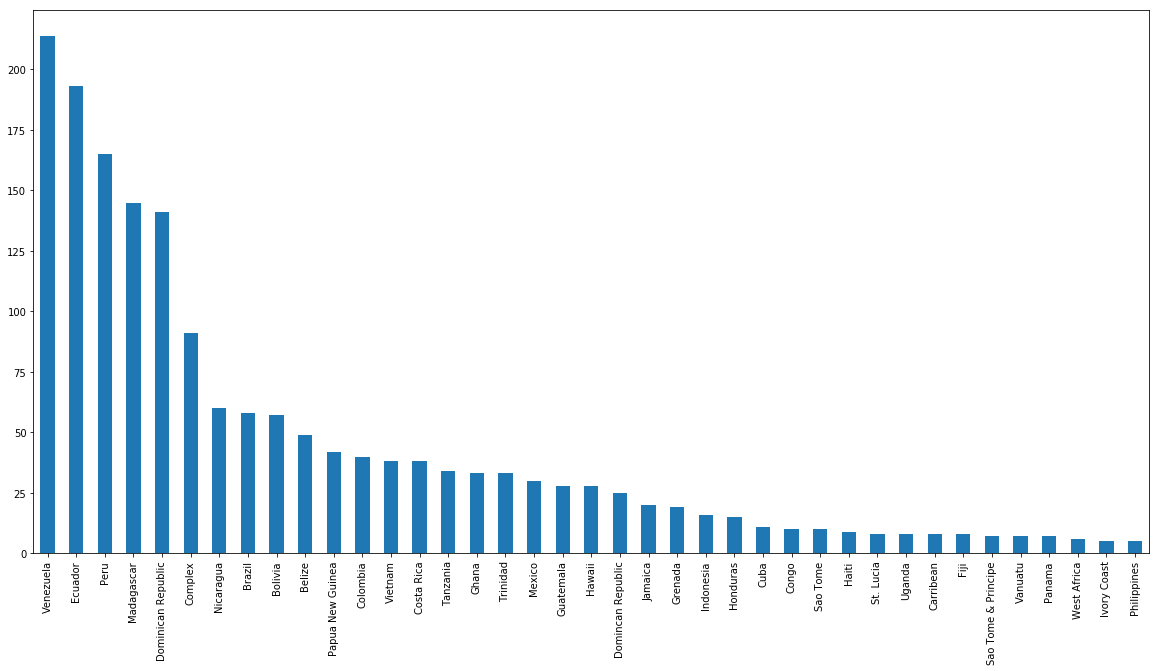

In [118]:
mask= best_bar_unique['bean_orig'].value_counts()<5
repl = mask[mask==True].keys()
best_bar_new = best_bar_unique.replace(repl, 'Complex')

graph_new = best_bar_new['bean_orig'].value_counts()
graph_new.plot(kind='bar', figsize = (20,10))


Постройте круговую гистограмму распределения для стран происзводителей какао бобов с помощью функции pie().

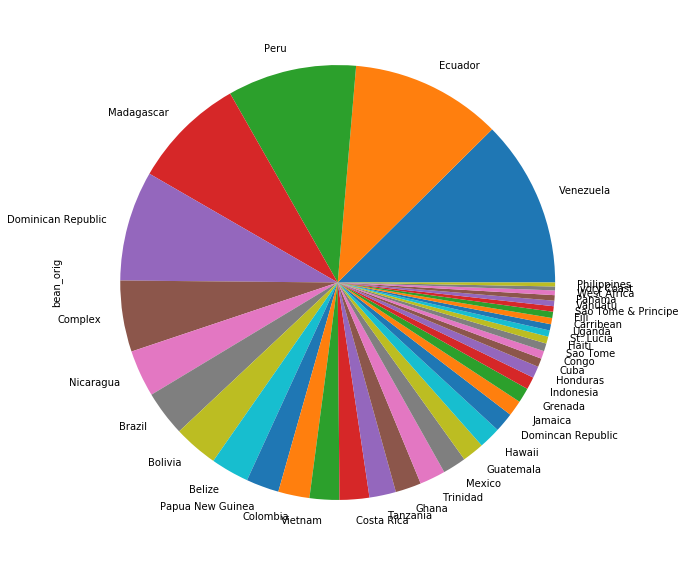

In [119]:
graph_new.plot(kind='pie', figsize = (20,10))

## Попарные графики распределений

In [120]:
from sklearn import preprocessing
from seaborn import pairplot

Построить попарные распределения для всех признаков.

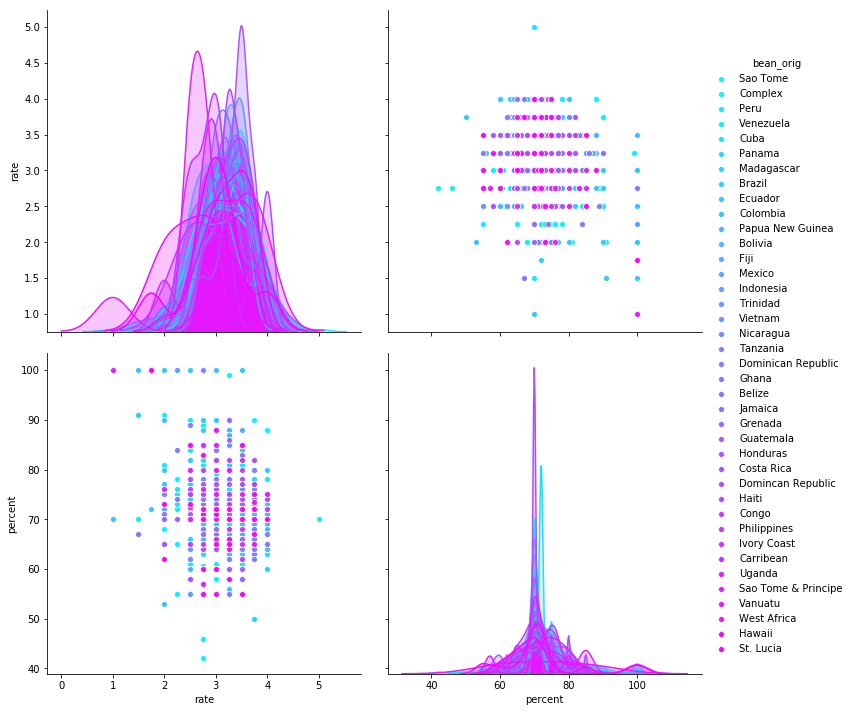

In [121]:
pairplot( best_bar_new, hue = 'bean_orig', palette = 'cool', height = 5)

D:\Program\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Program\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Program\Anaconda\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\Program\Anaconda\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


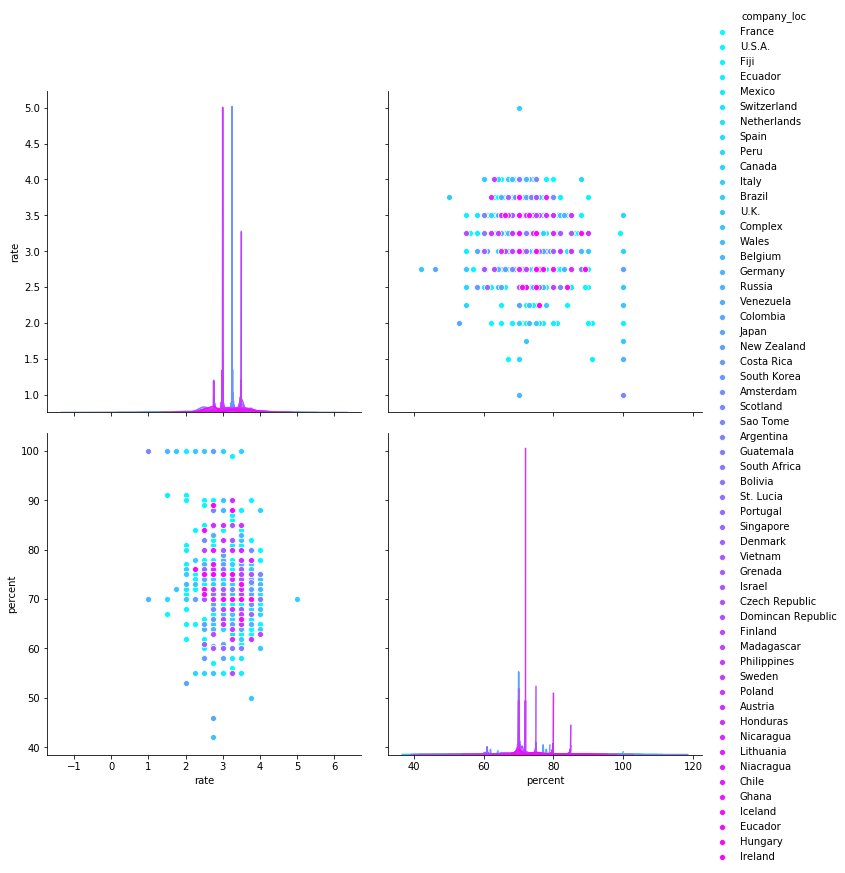

In [122]:
pairplot( best_bar_new, hue = 'company_loc', palette = 'cool', height = 5)

Определите, где растут лучшие какао бобы, вычислив средний значение и медиану рейтинга батончика для каждого места происхождения. Напишите первую тройку лучших в обоих случаях.

In [123]:
best_bean_avg = best_bar_new.groupby('bean_orig').mean()
del best_bean_avg['percent']
best_bean_avg = best_bean_avg.sort_values(by='rate', ascending =False)
best_bean_avg.head(3)

,rate
bean_orig,
Haiti,3.388889
Honduras,3.350000
Congo,3.325000


In [124]:
best_bean_med = best_bar_new.groupby('bean_orig').median()
del best_bean_med['percent']
best_bean_med = best_bean_med.sort_values(by='rate',ascending =False)
best_bean_med.head(3)

,rate
bean_orig,
Honduras,3.500
Sao Tome & Principe,3.500
Brazil,3.375


Определите, где производят лучшие батончики, вычислив средний значение и медиану рейтинга батончика для каждого места происхождения.

In [125]:
best_loc_avg = best_bar_new.groupby('company_loc').mean()
del best_loc_avg['percent']
best_loc_avg = best_loc_avg.sort_values(by='rate', ascending =False)
best_loc_avg.head(3)

,rate
company_loc,
Chile,3.75
Amsterdam,3.50
Poland,3.50


In [126]:
best_loc_med = best_bar_new.groupby('company_loc').median()
del best_loc_med['percent']
best_loc_med = best_loc_med.sort_values(by='rate',ascending =False)
best_loc_med.head(3)

,rate
company_loc,
Chile,3.75
Amsterdam,3.50
Spain,3.50
